# CS-433 Machine learning project 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helpers
from functions import *

%load_ext autoreload
%autoreload 2

In [2]:
# x_train = np.genfromtxt("data/dataset/x_train.csv", delimiter=',', skip_header=1)
# y_train = np.genfromtxt("data/dataset/y_train.csv", delimiter=',', skip_header=1)
# x_test =  np.genfromtxt("data/dataset/x_test.csv", delimiter=',', skip_header=1)
x_train, x_test, y_train, train_ids, test_ids = helpers.load_csv_data("data/dataset")

In [3]:
print(x_train[:,5])
print(x_train[0,5].dtype)
print(np.isnan(x_train[0,5]))
print(np.sum(np.isnan(x_train[:,10])))
print(y_train)

[2015. 2015. 2015. ... 2015. 2015. 2015.]
float64
False
139415
[-1 -1 -1 ... -1 -1 -1]


## Nan handling

In [4]:

#calculate number number of nan per column
logical_matrix = np.isnan(x_train)
nan_per_columns = np.sum(logical_matrix, axis=0)
print(nan_per_columns)
average_nan = np.mean(nan_per_columns)
print(average_nan)
print(np.shape(nan_per_columns))
print(np.shape(x_train)[1])

[     0      0      0      0      0      0      0      0      0 139415
 139415 328103 139416 139415 328103 139433 139524 139525 188720 188720
 188721 188720 327334 188719 189287 192544      2      1      0 159860
      0      0      1      1      1 196334      0  43801  43801      0
      0 284153      1      0      0      1      0      0      5 285915
      0      0      0      0 139415 318245 139415      1      0      3
   2471   3207   3946   4407 279663   6933   7743   8293   8728   9149
   9432   9862  10541 191379 282510 237369  11007  11765 170906 171212
 171522  20738  21567  22468  23149  23759  24502  26205 107829 109141
 109407 109690 181261 181400  28647 226907 227043 227197 229088  29911
  30600 186763 186001  31022  32080 243418 243561 266689 266689 306425
 306426 306428 306429 306429 306629 306429 306430 306430 247299 310302
 310320 310346 310367 310392 310403 310450 265347 325762 325769 325769
 327339 326264 325775 325777 325777 325780 241493 318477 318489 325051
 31850

In [5]:
# delet the columns with more nan than the average
x_train_reduced_features = x_train[:, nan_per_columns <= average_nan]




In [6]:
print(np.shape(x_train))

(328135, 321)


In [7]:
#replace nan values with the mean:
x_train_w_mean = x_train
for i in range( np.shape(x_train)[1]):
    nan_entries = np.isnan(x_train[:,i])
    mean = np.mean(x_train[~nan_entries,i])

    nan_entries = np.isnan(x_train[:,i])

    x_train_w_mean[nan_entries, i] = mean
    
logical_matrix = np.isnan(x_train_w_mean)
nan_per_columns2 = np.sum(logical_matrix, axis=0)
print(nan_per_columns2)





[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
x_train_std, _, _, = standardize(x_train_w_mean)
print(x_train_std)

[[ 1.43629640e+00  1.33036073e+00  1.31787257e+00 ... -4.98941290e-12
   2.63592491e-12  2.44635873e-02]
 [ 1.88772178e-01  1.61711904e+00  1.60160179e+00 ... -4.98941290e-12
   2.63592491e-12 -2.90142707e-13]
 [-6.22118565e-01  1.04360241e+00  1.04274121e+00 ... -8.59212775e-01
  -2.46031587e-01  2.44635873e-02]
 ...
 [ 5.63029444e-01  1.04360241e+00  1.04274121e+00 ... -1.93109791e-01
  -2.46031587e-01  2.44635873e-02]
 [ 1.88772178e-01  1.61711904e+00  1.64459107e+00 ... -4.98941290e-12
   2.63592491e-12  2.44635873e-02]
 [ 1.26395967e-01  7.56844099e-01  7.33218431e-01 ... -4.98941290e-12
   2.63592491e-12  2.44635873e-02]]


In [9]:


print(np.shape(x_train_std))



(328135, 321)


In [11]:
### Count the amount of incidents

minus_ones = np.sum((y_train == -1))

ones = np.sum(( y_train == 1))
print(f"There are {100*minus_ones/len(y_train):.2f} % minus ones.\n")
print(f"There are {100*ones/len(y_train):.2f} % ones.\n")

There are 91.17 % minus ones.

There are 8.83 % ones.



In [12]:
tx = x_train_std[:, [10, 42, 69]] # change input data here
y = y_train[:] # change target value here
y = y.reshape(-1, 1)



w_s=[]
losses=[]
w = np.full((tx.shape[1],1), 1e-16) 

max_iters=50
accs=[]
precs=[]
recs=[]
F1s=[]
batch_size = 1 
lambda_ = 1e-3
gamma = 0.1
#1) mean_squared_error_gd 
for i in range(max_iters):

    #1) mean_squared_error_gd
    #w, loss = mean_squared_error_gd(y, tx, w, max_iters, gamma)

    #2) mean_squared_error_sgd
    w, loss = mean_squared_error_sgd(y, tx, w, max_iters, gamma,  batch_size=128, num_batches=16) 

    #3) least_squares
    #w, loss = least_squares(y, tx)  # change input data here, matrix is not invertible[10, 12, 14/15/20/69]

    """ #4) ridge_regression
    w, loss = ridge_regression(y, tx, lambda_)

    #5) logistic_regression
    w, loss = logistic_regression(y, tx, w, max_iters, gamma)

    #6) reg_logistic_regression
    w, loss = reg_logistic_regression(y, tx, w, max_iters, gamma, lambda_) """
 
    losses.append(loss)

 
    y_pred=tx.dot(w)
    y_pred = compute_sigmoid(y_pred)
    y_pred[y_pred>0] = 1
    y_pred[y_pred<=0] = -1
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for pred in range(len(y_pred)):
        if (y_pred[pred] == 1 and y[pred] == 1):
            TP+=1
        elif (y_pred[pred] == 1 and y[pred] == -1):
            FP+=1
        elif (y_pred[pred] == -1 and y[pred] == 1):
            FN+=1
        else :
            TN+=1
    acc = (TP+TN)/len(y_pred)
    if TP + FP == 0:
        prec = 0  # Avoid division by zero
    else:
        prec = TP / (TP + FP)


    if TP + FN == 0:
        rec = 0  # Avoid division by zero
    else:
        rec = TP / (TP + FN)


    if prec + rec == 0:
        F1score = 0  # Avoid division by zero
    else:
        F1score = 2 * prec * rec / (prec + rec)


    if acc > 0.75 :
        w_s.append(w)

    accs.append(acc)
    precs.append(prec)
    recs.append(recs)
    F1s.append(F1score)
    conf_matrix = np.array([[TP, FP], [FN, TN]])
        
w_s = np.asarray(w_s)
print("lambda = ",lambda_,"| Accuracy moyenne :",np.mean(accs),"| Acc>0.75 :",w_s.shape[0])
print(accs)



TypeError: mean_squared_error_sgd() got an unexpected keyword argument 'batch_size'

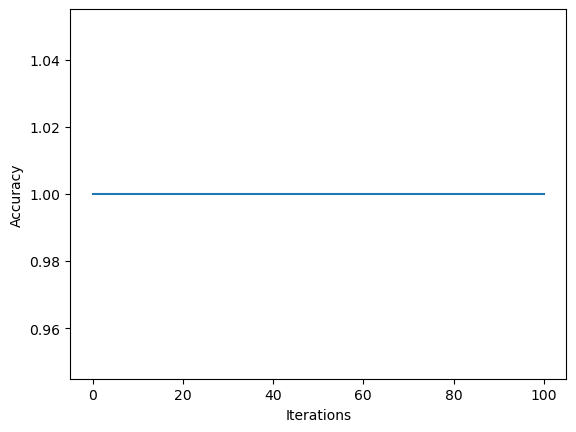

In [ ]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), accs)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
x_test = handle_nan_values(x_test, delete_nan_columns=False)
x_test, _, _  = standardize(x_test)




In [ ]:
### Generate first submission

y_test = x_test[:, [10, 42, 69]].dot(w)

logical_matrix = np.isnan(y_test)
nan_per_columns = np.sum(logical_matrix, axis=0)
print(nan_per_columns)
print(y_test)
y_test = compute_sigmoid(y_test)

y_test[y_test>0] = 1
y_test[y_test<=0] = -1



helpers.create_csv_submission(test_ids, y_test, "AI_crowd_submission")


[0]
[[-0.04222617]
 [-0.0423904 ]
 [ 0.23668699]
 ...
 [ 0.23668699]
 [ 0.37556434]
 [-0.04222617]]


In [ ]:
changed_data = False # used to make least_squares work

if changed_data:
    tx = x_train_std[:1000, [10, 42, 69]] # change input data here
    y = y_train[:1000] # change target value here
    y = y.reshape(-1, 1)
else:
    # divide dataset into train and test data in order to test prediction on other data than was used for testing
    train_data_size = 200000
    local_test_data_size = y_train.shape[0] - train_data_size
    total_data_size = y.shape[0]

    tx = x_train_std[:train_data_size, :]
    y = y_train[:train_data_size]
    x_local_test = x_train_std[train_data_size:, :]
    y_local_test = y_train[train_data_size:]

    y = y.reshape(-1, 1)
    y_local_test = y_local_test.reshape(-1, 1)

w_s=[]
losses=[]
w = np.full((tx.shape[1],1), 1e-16) 

max_iters=100
accs=[]
precs=[]
recs=[]
F1s=[]
batch_size = 1 
lambda_ = 1e-3
gamma = 0.1

gammas = np.arange(0.005, 0.3, 0.05)
lambdas = np.arange(0.00005, 0.003, 0.0005)

# Test different gammas and lambdas
#for gamma in gammas:
#    for lambda_ in lambdas:


#1) mean_squared_error_gd
w, loss = mean_squared_error_gd(y, tx, w, max_iters, gamma)
losses.append(loss)
y_local_pred = predict_y(w, x_local_test)
local_test_accuracy = ( total_data_size - np.sum(y_local_test != y_local_pred) ) / total_data_size
print("Local test accuracy of mean_squared_error_gd is", local_test_accuracy)

#2) mean_squared_error_sgd
w, loss = mean_squared_error_sgd(y, tx, w, max_iters, gamma)
losses.append(loss)

#3) least_squares
if changed_data:
    w, loss = least_squares(y, tx)  # change input data here, matrix is not invertible[10, 12, 14/15/20/69]

#4) ridge_regression
w, loss = ridge_regression(y, tx, lambda_)
losses.append(loss)

#5) logistic_regression
w, loss = logistic_regression(y, tx, w, max_iters, gamma)
losses.append(loss)

#6) reg_logistic_regression
w, loss = reg_logistic_regression(y, tx, w, max_iters, gamma, lambda_)
losses.append(loss)


y_pred=tx.dot(w)
y_pred = compute_sigmoid(y_pred)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<=0.5] = 0

TP = 0
FP = 0
TN = 0
FN = 0
for pred in range(len(y_pred)):
    if (y_pred[pred] == 1 and y[pred] == 1):
        TP+=1
    elif (y_pred[pred] == 1 and y[pred] == 0):
        FP+=1
    elif (y_pred[pred] == 0 and y[pred] == 1):
        FN+=1
    else :
        TN+=1
acc = (TP+TN)/len(y_pred)
if TP + FP == 0:
    prec = 0  # Avoid division by zero
else:
    prec = TP / (TP + FP)


if TP + FN == 0:
    rec = 0  # Avoid division by zero
else:
    rec = TP / (TP + FN)


if prec + rec == 0:
    F1score = 0  # Avoid division by zero
else:
    F1score = 2 * prec * rec / (prec + rec)


if acc > 0.75 :
    w_s.append(w)

accs.append(acc)
precs.append(prec)
recs.append(recs)
F1s.append(F1score)
conf_matrix = np.array([[TP, FP], [FN, TN]])
        
w_s = np.asarray(w_s)
print("lambda = ",lambda_,"| Accuracy moyenne :",np.mean(accs),"| Acc>0.75 :",w_s.shape[0])
print(accs)



Local test accuracy of mean_squared_error_gd is -127.135


c:\Users\jonas\EPFL\MA2\ML_Project1\functions.py:22: RuntimeWarning: overflow encountered in exp
  sigmoid = 1/(1+np.exp(-x))
c:\Users\jonas\EPFL\MA2\ML_Project1\functions.py:70: RuntimeWarning: overflow encountered in exp
  loss = np.sum(np.log(1 + np.exp(pred)) - y * pred)


lambda =  0.001 | Accuracy moyenne : 0.9744 | Acc>0.75 : 1
[0.9744]


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

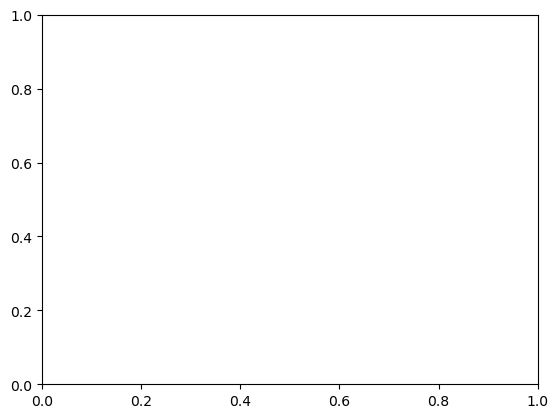

In [ ]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), accs)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()